Random Projection vs PCA

Begin importing dataset and understanding number of classes/features

In [5]:
from sklearn.datasets import fetch_rcv1
from sklearn.model_selection import train_test_split

rcv1 = fetch_rcv1(shuffle=True, random_state=0)
print(f"Data shape: {rcv1.data.shape}")

X, Y = rcv1.data, rcv1.target      # X: (n_samples, n_features), Y: multilabel CSR
names = rcv1.target_names

Data shape: (804414, 47236)


Create Random Projection Set

Create GuassianRandomProjetion and TSNE variables for dimensionality reduction. Then loop through the dataset in batches to make this less expensive. 

ValueError: 'c' argument has 805 elements, which is inconsistent with 'x' and 'y' with size 804414.

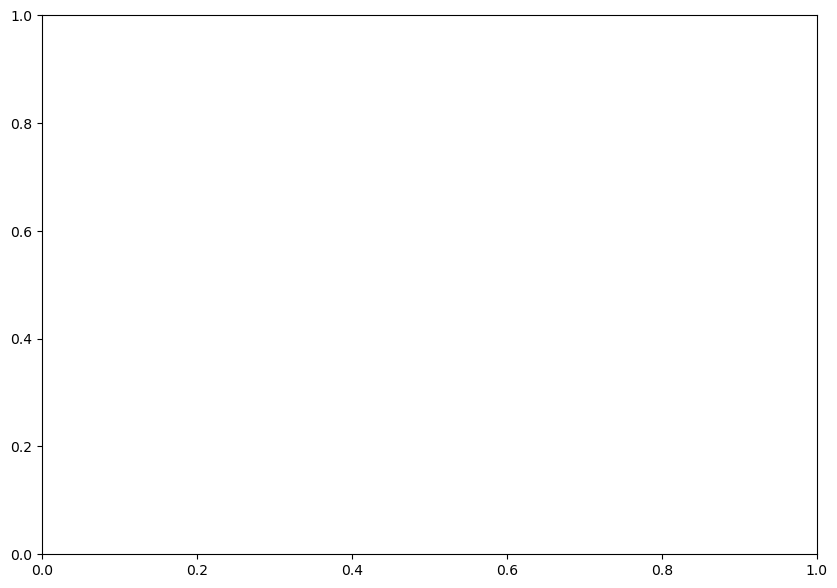

In [7]:
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

transformer = GaussianRandomProjection(n_components=50, random_state=0)
batch_size = 1000  # Adjust as needed
n_samples = X.shape[0]

tsne_results = []
label_results = []

for start in range(0, n_samples, batch_size):
    end = min(start + batch_size, n_samples)
    X_batch = X[start:end].toarray()
    Y_batch = Y[start:end]
    X_reduced_batch = transformer.fit_transform(X_batch)
    
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne_batch = tsne.fit_transform(X_reduced_batch)
    tsne_results.append(X_tsne_batch)
    label_results.append(Y_batch)

# Concatenate all batches
X_tsne_all = np.vstack(tsne_results)
Y_all = np.vstack(label_results)

# Now you can plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne_all[:, 0], X_tsne_all[:, 1], c=Y_all.argmax(axis=1), cmap='jet', s=10)
plt.colorbar()
plt.title('t-SNE Visualization of Randomly Projected RCV1 Data (batched)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

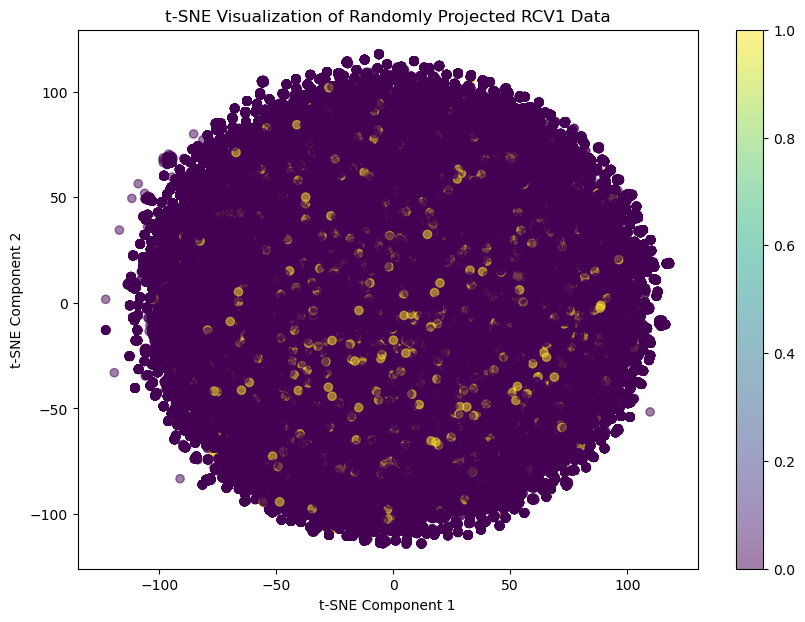

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= Y, cmap='jet', s=10)
plt.colorbar()
plt.title('t-SNE Visualization of Randomly Projected RCV1 Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Compare with PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=0)
X_pca = pca.fit_transform(X.toarray())
X_pca.shape

: 

In [ ]:
X_pca_tsne = tsne.fit_transform(X_pca)